<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
hh_raw_data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep = ';')
ex_raw_data = pd.read_csv('data/ExchangeRates.csv', sep = ',')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
hh = hh_raw_data.copy()
hh.head()
hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [4]:
hh.isna().sum()

Пол, возраст                         0
ЗП                                   0
Ищет работу на должность:            0
Город, переезд, командировки         0
Занятость                            0
График                               0
Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
dtype: int64

5. Выведите основную статистическую информацию о столбцах.


In [5]:
hh.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [6]:
def education_func(x):
    return '_'.join(x.split()[0:2])

hh['Образование'] = hh['Образование и ВУЗ'].apply(education_func)

di = {
    'Высшее_образование':'высшее',
    'Среднее_специальное':'среднее специальное',
    'Неоконченное_высшее':'неоконченное высшее',
    'Среднее_образование':'среднее'
      }

hh['Образование'] = hh['Образование'].map(di)
print(hh['Образование'].value_counts())
hh.drop('Образование и ВУЗ', axis = 1, inplace = True)

высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: Образование, dtype: int64


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [7]:
hh['Пол'] = hh['Пол, возраст'].apply(lambda x: {'Мужчина':'M', 'Женщина':'Ж'}[x.split()[0]])
print(hh['Пол'].value_counts(normalize = True))

hh['Возраст'] = hh['Пол, возраст'].apply(lambda x: int(x.split()[2]))
print(round(hh['Возраст'].mean(), 1))

hh.drop('Пол, возраст', axis = 1, inplace = True)

M    0.809293
Ж    0.190707
Name: Пол, dtype: float64
32.2


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [8]:
def get_experience(arg):
    
    if arg is np.nan: return np.nan
    if arg == 'Не указано': return np.nan

    l = arg.split('  ')[0]
    l = l.split(' ')
    bool_years = any(e in l for e in ['год', 'года', 'лет'])
    bool_month = any(e in l for e in ['месяц', 'месяца', 'месяцев'])

    int_l = [int(e) for e in l if e.isdigit()]

    if bool_years & bool_month: return 12 * int_l[0] + int_l[1]
    if bool_years: return 12 * int_l[0]
    if bool_month: return int_l[0]
    
hh['Опыт работы (месяц)'] = hh['Опыт работы'].apply(get_experience)
print(hh['Опыт работы (месяц)'].median())
hh.drop('Опыт работы', axis = 1, inplace = True)

100.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [9]:
# Функция для выявления города из признака 'Город, переезд, командировки'

def get_city(arg):

    million_cities = [
        'Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск', 'Омск', 
        'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград'
        ]

    real_city = arg.split(' , ')[0].split(' ')[0]
    
    if real_city in ['Москва', 'Санкт-Петербург']: return real_city
    if real_city in million_cities: return 'город-миллионник'
    return 'другие'

hh['Город'] = hh['Город, переезд, командировки'].apply(get_city)
print(hh['Город'].value_counts(normalize = True))

# Функция для выявления готовности к переездам из признака 'Город, переезд, командировки'

def ready_to_move(arg):

    l = arg.split(' , ')
    if 'м.' in l[1].split():
        readyness = l[2]
    else:
        readyness = l[1]
    return not 'не' in readyness.split()

hh['Готовность к переезду'] = hh['Город, переезд, командировки'].apply(ready_to_move)

# Функция для выявления готовности к командировкам из признака 'Город, переезд, командировки'

def ready_to_business_trips(arg):
    
    split_text = arg.split(' , ')[-1].split()
    if ('командировкам' in split_text) and ('не' not in split_text): return True
    return False

hh['Готовность к командировкам'] = hh['Город, переезд, командировки'].apply(ready_to_business_trips)

# Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам?

ans = pd.crosstab(hh['Готовность к переезду'], hh['Готовность к командировкам'], margins = False, normalize = True).unstack().reset_index()
ans = 100 * ans[(ans['Готовность к командировкам'] == True) & (ans['Готовность к переезду'] == True)][0]
print(round(float(ans)))

# Удаление признака 'Город, переезд, командировки'

hh.drop('Город, переезд, командировки', axis = 1, inplace = True)

Москва              0.371469
другие              0.367692
город-миллионник    0.150501
Санкт-Петербург     0.110339
Name: Город, dtype: float64
32


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [10]:
def one_hot_encoding(df, attr):

    unique_lists = df[attr].unique()
    
    unique_values = []
    for e in unique_lists:
        small_list = e.split(', ')
        for e2 in small_list:
            unique_values.append(e2)
        
    new_columns = list(set(unique_values))

    for col in new_columns:
        df[col] = df[attr].apply(lambda x: col in x)
    
    return df

hh = one_hot_encoding(df = hh, attr = 'Занятость')
hh = one_hot_encoding(df = hh, attr = 'График')

# Сколько людей ищут проектную работу и волонтёрство?

print(pd.crosstab(hh['проектная работа'], hh['волонтерство']).loc[True].loc[True])

# Сколько людей хотят работать вахтовым методом и с гибким графиком?

print(pd.crosstab(hh['вахтовый метод'], hh['гибкий график']).loc[True].loc[True])

hh.drop(['Занятость', 'График'], axis = 1, inplace = True)

436
2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [11]:
# Таблица с валютами

ex = ex_raw_data.copy()

# Перевод признака "date" из таблицы с валютами в формат datetime и извлечение из него дат

ex['date'] = pd.to_datetime(ex['date'], dayfirst = True).dt.date

# Перевод признака "Обновление резюме" из таблицы с резюме в формат datetime и извлечение из него дат

hh['date'] = hh['Обновление резюме'].apply(lambda x: pd.to_datetime(x.split()[0], format = '%d.%m.%Y').date())

# Выделение из столбца "ЗП" суммы заработной платы и наименование валюты, в которой она исчисляется 

hh['salary'] = hh['ЗП'].apply(lambda x: float(x.split()[0]))
hh['currency'] = hh['ЗП'].apply(lambda x: x.split()[1])

# Перевод наименования валюты в стандарт ISO

di = {'руб.':'RUB', 'бел.руб.':'BYN', 'KZT':'KZT', 'EUR':'EUR', 'USD':'USD',
      'грн.':'UAH', 'сум':'UZS', 'KGS':'KGS', 'AZN':'AZN'}
hh['currency'] = hh['currency'].map(di)

# Объединение обеих таблиц по дате и наименованию валюты с сохранием всех строк с таблице с резюме

merged = hh.merge(ex[['currency', 'date', 'close', 'proportion']], on = ['date', 'currency'], how = 'left')

# Заполнение курсов валют и пропорций единицами у резюме с зарплатой в рублях

merged.fillna({'close':1, 'proportion':1}, inplace = True)

# Перевод всех зарплаи в рубли

merged['ЗП (руб)'] = merged['salary'] * merged['close'] / merged['proportion']

# Медианная заработная плата соискателей (в тысячах рублей) округлённая до целого

print(round(merged['ЗП (руб)'].median() / 1000))

# Удаление ненужных столбцов

hh = merged.drop(['Обновление резюме', 'ЗП', 'salary', 'currency', 'close', 'proportion', 'date'], axis = 1)

59


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

0    30
Name: Возраст, dtype: int64


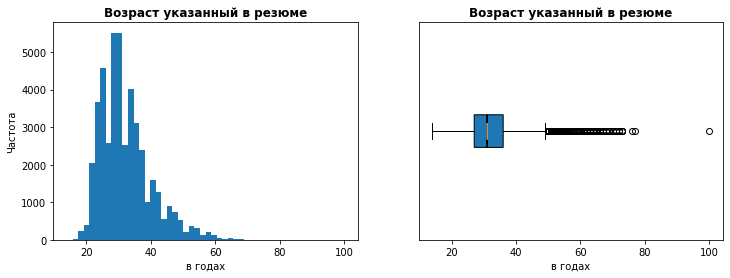

In [12]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

# Гистограмма

axes[0].hist(x = hh['Возраст'], bins = 50)
axes[0].set_title('Возраст указанный в резюме', fontsize = 12, fontweight = "bold")
axes[0].set_xlabel('в годах', fontsize = 10)
axes[0].set_ylabel('Частота', fontsize = 10);

# Коробчатая 

axes[1].boxplot(hh['Возраст'], patch_artist = True, notch = 'True', vert = 0)
axes[1].set_title('Возраст указанный в резюме', fontsize = 12, fontweight = "bold")
axes[1].set_xlabel('в годах', fontsize = 10)
axes[1].set_yticks([]);

# Модальное значение возраста соискателей

print(hh['Возраст'].mode())


Распределение претендентов по возрасту имеет тяжелый правый хвост и, по-видимому, хорошо параметризуется некоторым теоретическим распределением (например, вашим любимым лог-нормальным). Наиболее распространенный возраст заявителя около тридцати лет (мода распределения). Основная же масса находится в диапазоне от 20 до 40 лет. На коробчатой диаграмме (справа) показаны два кандидата в возрасте около 80 лет и один явный выброс в районе 100 лет.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

1188.0


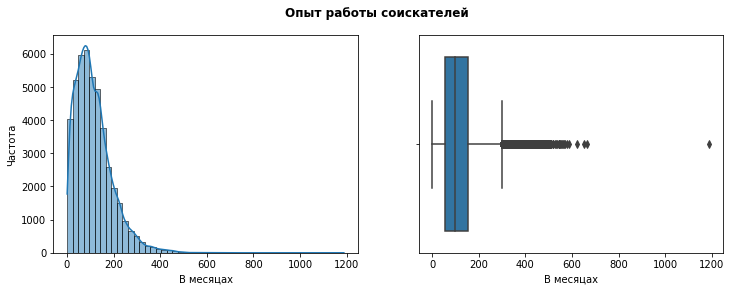

In [13]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

sns.histplot(
    data = hh,
    x = 'Опыт работы (месяц)',
    bins = 50,
    kde = True,
    ax = axes[0]
)
sns.boxplot(
    data = hh,
    x = 'Опыт работы (месяц)',
    ax = axes[1]
)

axes[0].set_ylabel('Частота', fontsize = 10)
axes[0].set_xlabel('В месяцах', fontsize = 10)
axes[1].set_xlabel('В месяцах', fontsize = 10)
fig.suptitle('Опыт работы соискателей', fontsize = 12, fontweight = "bold");

# Максимальный опыт работы (в месяцах)

print(hh['Опыт работы (месяц)'].max())

Большинство соискателей имеют опыт работы от 50 до 150 месяцев c наибольшей концентрацией значений в районе 80-100 месяцев. Медианное значение равно 100, мода - 80 месяцев. Имеется один явный выброс (1188 месяцев, или почти 10 лет), что выглядит как ошибка.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


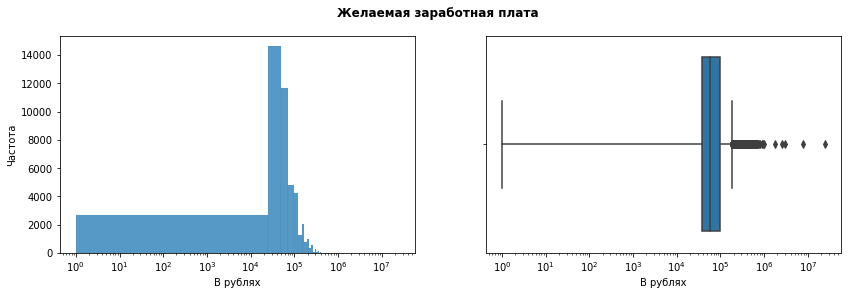

In [14]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 4))

sns.histplot(
    data = hh,
    x = 'ЗП (руб)',
    bins = 1000,
    ax = axes[0]
)
sns.boxplot(
    data = hh,
    x = 'ЗП (руб)',
    ax = axes[1]
)

axes[0].set_ylabel('Частота', fontsize = 10)
axes[0].set_xlabel('В рублях', fontsize = 10)
axes[1].set_xlabel('В рублях', fontsize = 10)

axes[0].set_xscale('log')
axes[1].set_xscale('log')

fig.suptitle('Желаемая заработная плата', fontsize = 12, fontweight = "bold");

В связи с тем, что распределение желаемой зарплаты имеет существенные значения в правом хвосте, была использована логарифмическая шкала для визуальной оценки данных. На графиках видно, что выбросами могут считаться все значения более миллиона рублей справа (всего 5 наблюдений) и, например, значения менее 10 тысяч рублей слева (211 наблюдений). Это незначительное количество точек, чтобы от них избавиться, если сравнивать с общим размером набора данных (44744 записей).

Некоторые статистические показатели:
* Мода 50 тысяч рублей;
* Медиана 59 тысяч рублей;
* Межквартильный размах (диапазон, где находится желаемая ЗП большинства соискателей) - от 37 до 95 тыс. рублей.





4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

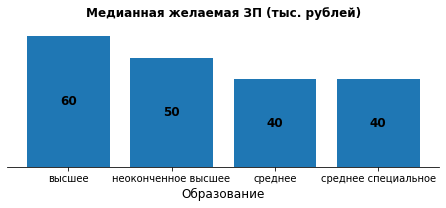

In [15]:
d = hh[hh['ЗП (руб)'] < 1000000].groupby(["Образование"])['ЗП (руб)'].median() / 1000

fig = plt.figure(figsize = (6, 2))
axes = fig.add_axes([0, 0, 1, 1])

axes.set_title('Медианная желаемая ЗП (тыс. рублей)', fontsize = 12, fontweight = "bold")
axes.set_xlabel('Образование', fontsize = 12)
axes.yaxis.set_visible(False)
axes.set_ylim([0, 1.1 * max(d)])

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['left'].set_visible(False)

p = axes.bar(x = d.index, height = d);
axes.bar_label(p, labels = d.values.astype('int'), fontweight = "bold", fontsize = 12, label_type = 'center');

Наибольший уровень медианной желаемой заработной платы отмечается у кандидатов с высшим образованием (60 тыс. рублей), наименьший - у кандидатов с обоими видами среднего (40 тыс. рублей). Безусловно, зависимость между двумя этими признаками есть, что должно отразится при построении и выборе статистических моделей.

*Из набора данных исключены значения свыше 1 млн. рублей.*

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

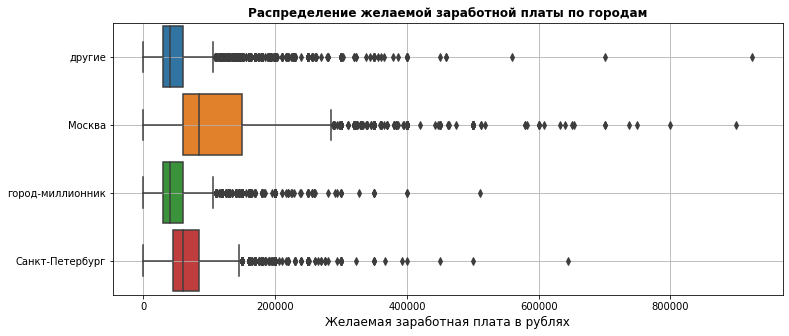

In [16]:
fig = plt.figure(figsize = (12, 5))
boxplot = sns.boxplot(
    data = hh[hh['ЗП (руб)'] < 1000000],
    y = 'Город',
    x = 'ЗП (руб)',
    orient = 'h',
    width = 0.9
)

boxplot.set_title('Распределение желаемой заработной платы по городам', fontsize = 12, fontweight = "bold");
boxplot.set_xlabel('Желаемая заработная плата в рублях', fontsize = 12)
boxplot.set_ylabel(None);
boxplot.grid()

Москва и Санкт-Петербург значительно отличаются от всех прочих городов в плане распределения желаемой заработной платы. Самое высокое медианное значение у Москвы (85 тыс. рублей), потом у Санкт_Петербурга (60 тыс. рублей) и конце у городов-милионников и более мелких (по 40 тыс. рублей). Причём чем крупнее город, тем больше межквартильный размах (диапазон, где сосредаточено большинство значений) - у Москвы он более чем в два раза больше, чем у Санкт-Петербурга. Несомненно, все четыре распределения визуально разные и признак города будет играть существенную роль при прогнозировании уровня заработной платы.

*Из набора данных исключены значения свыше 1 млн. рублей.*

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

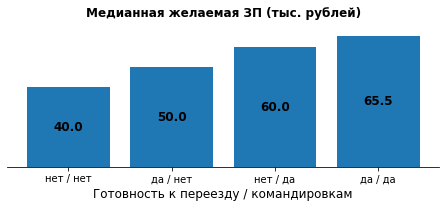

In [17]:
grouped = hh[hh['ЗП (руб)'] < 1000000].groupby(['Готовность к переезду', 'Готовность к командировкам'])['ЗП (руб)'].median() / 1000
d = pd.DataFrame({'Медианная ЗП (тыс. руб)' : grouped}).reset_index().sort_values('Медианная ЗП (тыс. руб)')
d['Готовность к переезду'] = d['Готовность к переезду'].map({False:'нет', True:'да'})
d['Готовность к командировкам'] = d['Готовность к командировкам'].map({False:'нет', True:'да'})
d['Готовность'] = d['Готовность к переезду'] + ' / ' + d['Готовность к командировкам']

fig = plt.figure(figsize = (6, 2))
axes = fig.add_axes([0, 0, 1, 1])

axes.set_title('Медианная желаемая ЗП (тыс. рублей)', fontsize = 12, fontweight = "bold")
axes.set_xlabel('Готовность к переезду / командировкам', fontsize = 12)
axes.yaxis.set_visible(False)
axes.set_ylim([0, 1.1 * max(d['Медианная ЗП (тыс. руб)'])])

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['left'].set_visible(False)

p = axes.bar(x = d['Готовность'], height = d['Медианная ЗП (тыс. руб)']);
axes.bar_label(p, labels = round(d['Медианная ЗП (тыс. руб)'], 1), fontweight = "bold", fontsize = 12, label_type = 'center');


Многоуровневая диаграмма здесь подходит меньше, поскольку неизвестно, какой из признаков "главнее". Готовность к переездам с разбивкой на тех кто готов к командировкам и кто нет? Или, наоборот, готовность к командировкам с разбивкой на тех, кто готов к переездам а кто нет? Наглядней проанализировать все четыре возможные комбинации независимо, расположив их по возрастанию медианной заработной платы (см. выше).

Из графика видно, что наименьшая желаемая медианная ЗП у тех, кто не готов ни к переезду, ни к командировкам, а наибольшая у тех, кто, наоборот, готов и к тому, и к тому. Зарплаты существенно различаются, что говорит о том, что оба признака (как по отдельности, так и при взаимодействии друг с другом) могут быть значимыми предикторами при построении модели, прогнозирующей заработную плату.

*Из набора данных исключены значения свыше 1 млн. рублей.*


7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

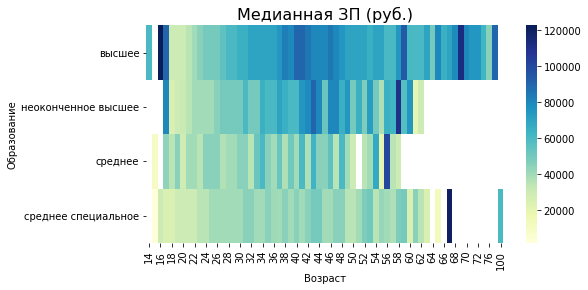

In [18]:
pivot = hh[hh['ЗП (руб)'] < 1000000].pivot_table(values = 'ЗП (руб)', columns = 'Возраст', index = 'Образование', aggfunc = 'median')
pivot.columns = pivot.columns.astype('string')

fig = plt.figure(figsize = (8, 4))
heatmap = sns.heatmap(data = pivot, cmap = 'YlGnBu')
heatmap.set_title('Медианная ЗП (руб.)', fontsize = 16);

1. Уровень образования существенно влияет на желаемую ЗП - чем он выше, тем медианная ЗП больше. Причём это видно во всех разрезах возрастов.
2. У людей с высшим и неоконченным высшим образованиями уровень ЗП с возрастом растёт, достигая максимума примерно к 40 годам, затем слегка снижается и снова возрастает к 70 годам.
3. Самые высокие желаемые зарплаты есть и в 16 лет у высшего образования, в 67 лет у среднего специального и в 58 лет у неоконченного высшего, но это, скорее, исключения.
4. Общий вывод такой: самые низкооплачиваемые кандидаты находятся в возрасте младше 22 лет (вне зависимости от образования), самые высокопочитаемые - это сорокалетние с высшим и неоконченным высшим образованием.

*Из набора данных исключены значения свыше 1 млн. рублей.*

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

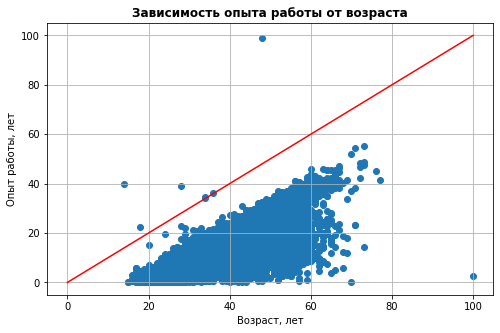

7


In [19]:
import matplotlib.lines as mlines

hh['Опыт работы (лет)'] = (hh['Опыт работы (месяц)'] // 12) + ((hh['Опыт работы (месяц)'] % 12) / 12)

fig, axes = plt.subplots(figsize = (8, 5))

axes.scatter(hh['Возраст'], hh['Опыт работы (лет)'])
line = mlines.Line2D([0, 100], [0, 100], color = 'red')
axes.add_line(line)

axes.grid()
axes.set_title('Зависимость опыта работы от возраста', fontsize = 12, fontweight = "bold")
axes.set_xlabel('Возраст, лет', fontsize = 10)
axes.set_ylabel('Опыт работы, лет', fontsize = 10);

plt.show()

# Сколько точек лежат строго выше построенной прямой?

print(sum(hh['Опыт работы (лет)'] > hh['Возраст']))

Опыт работы и возраст связаны друг с другом прямым образом, однако линейной регрессии построить не получится, поскольку остатки имеют явно не нормальное распределение. С другой стороны, данные расходятся относительно правильным образом, что, после их предварительной трасформации, может привести к довольно-таки правдивой модели. **Семь** точек находятся выше 45 градусной прямой, что, по вашей классификации, относит их к аномалиям.

Между вышеупомянутой прямой и верней границей облака данных наблюдается чёткий правильный корридор шириной примерно равный возрасту начала трудовой деятельности у существенного числа кандидатов.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


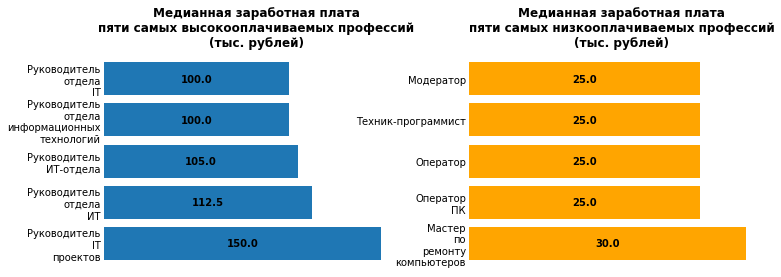

In [20]:
# Frequency table для запрашиваемых профессий

cnt = hh['Ищет работу на должность:'].value_counts()
d = pd.DataFrame({'Число соискателей' : cnt}).reset_index()

# Доля n первых популярных профессий среди общего числа поданых заявок

d['Кумулятивная сумма'] = np.cumsum(d['Число соискателей'])
d['Доля'] = d['Кумулятивная сумма'] / hh.shape[0]

# 100 самых популярных профессий

d100 = d.head(n = 100)
d100 = d100.rename(columns = {'index':'Ищет работу на должность:'})

# Медианная желаемая ЗП для всех профессий из общего датасета

grouped = hh[hh['ЗП (руб)'] < 1000000].groupby(['Ищет работу на должность:'])['ЗП (руб)'].median() / 1000
salary = pd.DataFrame({'Медианная ЗП (тыс. руб)' : grouped}).reset_index().sort_values('Медианная ЗП (тыс. руб)', ascending = False)

# Медианная желаемая ЗП для 100 самых популярных профессий

merged = d100.merge(salary, on = 'Ищет работу на должность:', how = 'left').sort_values('Медианная ЗП (тыс. руб)', ascending = False)

# 5 профессий с самой высокой и с самой низкой желаемой медианной ЗП из 100 самых популярных

big = merged[['Ищет работу на должность:', 'Медианная ЗП (тыс. руб)']].head(5)
small = merged[['Ищет работу на должность:', 'Медианная ЗП (тыс. руб)']].tail(5)


fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

# Левый график (5 высокооплачиваемых)

axes[0].set_title('Медианная заработная плата\nпяти самых высокооплачиваемых профессий\n(тыс. рублей)', fontsize = 12, fontweight = "bold")

axes[0].xaxis.set_visible(False)
axes[0].tick_params(axis = 'both', which = 'both', length = 0)
axes[0].set_xlim([0, 1.1 * max(big['Медианная ЗП (тыс. руб)'])])

axes[0].set_yticks([i for i in range(big.shape[0])])
axes[0].set_yticklabels(big['Ищет работу на должность:'].str.replace(' ', '\n'))

axes[0].spines['top'].set_visible(False)
axes[0].spines['bottom'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_visible(False)

p0 = axes[0].barh(big['Ищет работу на должность:'], big['Медианная ЗП (тыс. руб)']);
axes[0].bar_label(p0, labels = round(big['Медианная ЗП (тыс. руб)'], 1), fontweight = "bold", fontsize = 10, label_type = 'center');

# Правый график (5 низкооплачиваемых)

axes[1].set_title('Медианная заработная плата\nпяти самых низкооплачиваемых профессий\n(тыс. рублей)', fontsize = 12, fontweight = "bold")

axes[1].xaxis.set_visible(False)
axes[1].tick_params(axis = 'both', which = 'both', length = 0)
axes[1].set_xlim([0, 1.1 * max(small['Медианная ЗП (тыс. руб)'])])

axes[1].set_yticks([i for i in range(small.shape[0])])
axes[1].set_yticklabels(small['Ищет работу на должность:'].str.replace(' ', '\n'))

axes[1].spines['top'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)

p1 = axes[1].barh(small['Ищет работу на должность:'], small['Медианная ЗП (тыс. руб)'], color = 'orange');
axes[1].bar_label(p1, labels = round(small['Медианная ЗП (тыс. руб)'], 1), fontweight = "bold", fontsize = 10, label_type = 'center');


#### Пять самых высоко- и низкооплачиваемых популярных профессий

1. Задача состоит в том, чтобы выяснить у каких пяти профессий из ста самых популярных самые высокие и самые низкие желаемые медианные заработные платы.
2. Доля ста самых популярных профессий составляет **46.56%** от общего числа всех уникальных профессий указанных в поле данных "Ищет работу на должность:".
3. Количество заявок у профессий из этого списка "Топ 100" - от 50 до 3099, что позволяет относительно точно подсчитать медианную ЗП для каждой из них.
4. Недостаток этого анализа состоит в том, что многие профессии дублируются даже внутри этого списка из-за разного написания (например, "Руководитель отдела ИТ" и "Руководитель ИТ-отдела"), а также могут встречаться в комбинациях у менее популярных профессий. Из-за этого можно делать только общие выводы.
5. Самые высокооплачиваемые профессии согласно желаемой медианной заработной плате - **Руководитель IT проектов** и **Руководитель IT отдела**, который встречается в этой мини-подборке аж четыре раза в разных комбинациях написания из-за особенностей, описанных выше. Самые низкооплачиваемые видны на графика справа (причём, судя по всему, "Оператор" и "Оператор ПК" - это одна и та же профессия).
6. Видно, что эта выдержка из базы HeadHunter содержит, в основном информацию об IT специалистах (а не о банковских работниках, врачах или высококвалифицированных рабочих, например), что делает её довольно таки узкоспециализированной.

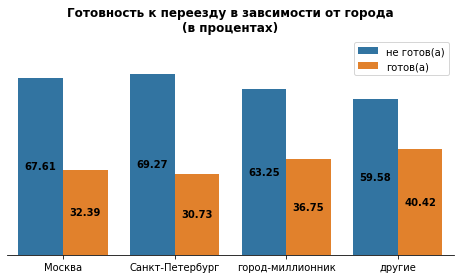

In [21]:
# Зависимость готовности к переезду от города

d = pd.crosstab(hh['Город'], hh['Готовность к переезду'], margins = False, normalize = 'index').unstack().reset_index()
d['Percent'] = round(100 * d[0], 2)
d['Готовность к переезду'] = d['Готовность к переезду'].map({False:'не готов(а)', True:'готов(а)'})
d.drop([0], axis = 1, inplace = True)

fig = plt.figure(figsize = (8, 4))

p = sns.barplot(
    data = d,
    x = 'Город',
    y = 'Percent',
    hue = 'Готовность к переезду'
)

p.set_title('Готовность к переезду в завсимости от города\n(в процентах)', fontweight = 'bold')
p.set_xlabel(None)

hands, labs = p.get_legend_handles_labels()
p.legend(handles = hands, labels = labs)

p.yaxis.set_visible(False)
p.spines['top'].set_visible(False)
p.spines['right'].set_visible(False)
p.spines['left'].set_visible(False)

p.set_ylim([0, 1.2 * d['Percent'].max()])

for container in p.containers:
    p.bar_label(container, fontweight = 'bold', label_type = 'center');

#### Зависимость готовности к переезду от города

Диаграмма показывает соотношение желающих уехать и остаться при устройстве на новую работу в зависимости от места проживания. Самое высокое число желающих уехать родом из маленьких городов (категория "другие") - около 40% от всех кандидатов, самое низкое - из Санкт Петербурга (31%). Москва с 32% находится рядом.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [22]:
a1 = hh.shape[0]
hh = hh.drop_duplicates()
a2 = hh.shape[0]
print(a1 - a2)

1315


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [23]:
hh.isna().sum()

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                167
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
стажировка                           0
проектная работа                     0
полная занятость                     0
волонтерство                         0
частичная занятость                  0
удаленная работа                     0
вахтовый метод                       0
гибкий график                        0
полный день                          0
сменный график                       0
ЗП (руб)                             0
Опыт работы (лет)                  167
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [24]:
hh.dropna(subset = 'Последнее/нынешнее место работы', inplace = True, how = 'all')
hh.dropna(subset = 'Последняя/нынешняя должность', inplace = True, how = 'all')
hh = hh.fillna({'Опыт работы (месяц)': hh['Опыт работы (месяц)'].median()})
print(hh['Опыт работы (месяц)'].mean().round())

114.0


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [25]:
print(sum((hh['ЗП (руб)'] > 1000000)) + sum((hh['ЗП (руб)'] < 1000)))
hh = hh[(hh['ЗП (руб)'] >= 1000) & (hh['ЗП (руб)'] <= 1000000)]

89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [26]:
hh['Опыт работы (лет)'] = (hh['Опыт работы (месяц)'] // 12) + ((hh['Опыт работы (месяц)'] % 12) / 12)
print(sum(hh['Опыт работы (лет)'] > hh['Возраст']))

print(hh.shape[0])
hh = hh[hh['Опыт работы (лет)'] <= hh['Возраст']]
print(hh.shape[0])


7
43338
43331


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

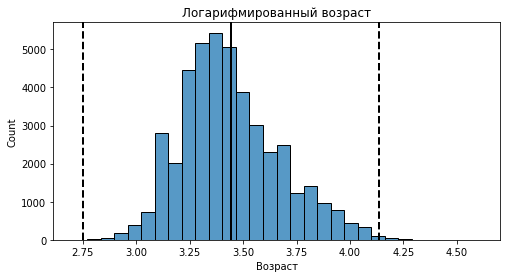

In [27]:
fig, ax = plt.subplots(1, 1, figsize = (8, 4))
log_age = np.log(hh['Возраст'])
histplot = sns.histplot(log_age, bins = 30, ax = ax)
histplot.axvline(log_age.mean(), color = 'k', lw = 2)
histplot.axvline(log_age.mean() + 3 * log_age.std(), color = 'k', ls = '--', lw = 2)
histplot.axvline(log_age.mean() - 3 * log_age.std(), color = 'k', ls = '--', lw = 2)
histplot.set_title('Логарифмированный возраст');




Распределение ассимитрично в левую сторону (сдвинуто влево), что говорит о том, что соискателей с возрастом меньше среднего (молодых) больше, чем лиц более старшего возраста.

In [32]:
def outliers_z_score_mod(data, feature, log_scale = False, left = 3, right = 3):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score_mod(hh, 'Возраст', log_scale = True, left = 3, right = 4)
print(outliers[['Ищет работу на должность:', 'ЗП (руб)', 'Возраст']])

            Ищет работу на должность:  ЗП (руб)  Возраст
31137  Менеджер по работе с клиентами   10000.0       15
32950                 Тестировщик игр    2000.0       15
33654            Frontend-разработчик   60000.0      100


Под возрастные выбросы попадает три резюме с двумя 15-летними и одним 100-летним кандидатами.